<div>
Olá, Reinner!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

# Statement

A companhia de seguros Proteja Seu Amanhã quer resolver algumas tarefas com a ajuda de aprendizado de máquina e você precisa avaliar a possibilidade de fazê-lo.

- Tarefa 1: Encontrar clientes semelhantes a um determinado cliente. Isso vai ajudar os agentes da empresa com tarefas de marketing.
- Tarefa 2: Predizer se um novo cliente provavelmente receberá um pagamento de seguro. Um modelo de predição pode ser melhor do que um modelo dummy?
- Tarefa 3: Predizer o número de pagamentos de seguro que um novo cliente provavelmente receberá usando um modelo de regressão linear.
- Tarefa 4: Proteger os dados pessoais dos clientes sem estragar o modelo da tarefa anterior. É necessário desenvolver um algoritmo de transformação de dados que tornaria difícil recuperar informações pessoais se os dados caíssem nas mãos erradas. Isso é chamado de mascaramento de dados ou ofuscação de dados. Mas os dados devem ser protegidos de forma que a qualidade dos modelos de aprendizado de máquina não piore. Você não precisa escolher o melhor modelo, só prove que o algoritmo funciona corretamente.

# Pré-processamento de dados & Exploração

## Inicialização

In [2]:
pip install scikit-learn --upgrade --user

  Using cached scikit_learn-1.4.1.post1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
from sklearn.neighbors import NearestNeighbors
import sklearn.preprocessing
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

import math
from sklearn.metrics import mean_squared_error, r2_score

from IPython.display import display

## Carregar Dados

Carregue os dados e faça uma verificação básica de que estão livres de problemas óbvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os conjuntos de dados foram carregados corretamente.
- Os dados foram carregados em células diferentes.
</div>

Renomeamos as colunas para tornar o código mais consistente com seu estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
1525,1,36.0,40500.0,1,0
1135,1,30.0,35300.0,1,0
1389,1,24.0,36700.0,1,0
3493,1,42.0,54000.0,2,0
2245,0,34.0,55200.0,2,0
1052,0,29.0,40100.0,0,0
4765,1,46.0,25900.0,3,1
4103,1,19.0,46100.0,2,0
4296,1,36.0,25500.0,1,0
4909,1,42.0,45600.0,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


We don´t have any missing value

In [7]:
# podemos querer corrigir o tipo de idade (de float para int), embora isso não seja crítico

# escreva sua conversão aqui se você escolher:

In [8]:
# verifique se a conversão foi bem-sucedida

In [9]:
# agora dê uma olhada nas estatísticas descritivas dos dados.
# Parece que está tudo bem?

In [10]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os métodos `sample()` e `info()` foram usados para estudo inicial do conjunto de dados
- O método `describe()` foi utilizado para calcular estatísticas sumarizadas dos dados
</div>

The datas are statiscal normaly. Lets plot the boxplot to check outliers

Text(0.5, 1.0, 'Income')

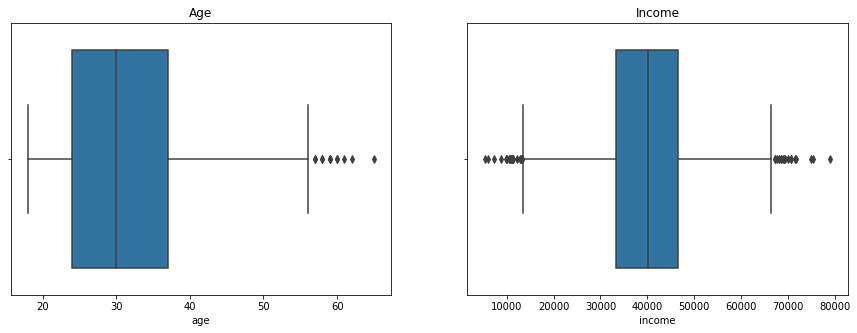

In [11]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x="age", data=df, ax=axes[0]);
axes[0].set_title("Age")
sns.boxplot(x="income", data=df, ax=axes[1]);
axes[1].set_title("Income")

Analysing boxplot it´s possible to see that we have outliers in `age`(over 55 years) and `outcome` (below 12.00 and over 70.000)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Análise de `outliers` foi apresentada
- O gráfico de caixa foi usado corretamente. Dica: poderia plotar a distribuição também usando histogramas
</div>

## AED

Vamos verificar rapidamente se existem determinados grupos de clientes observando o gráfico de pares.

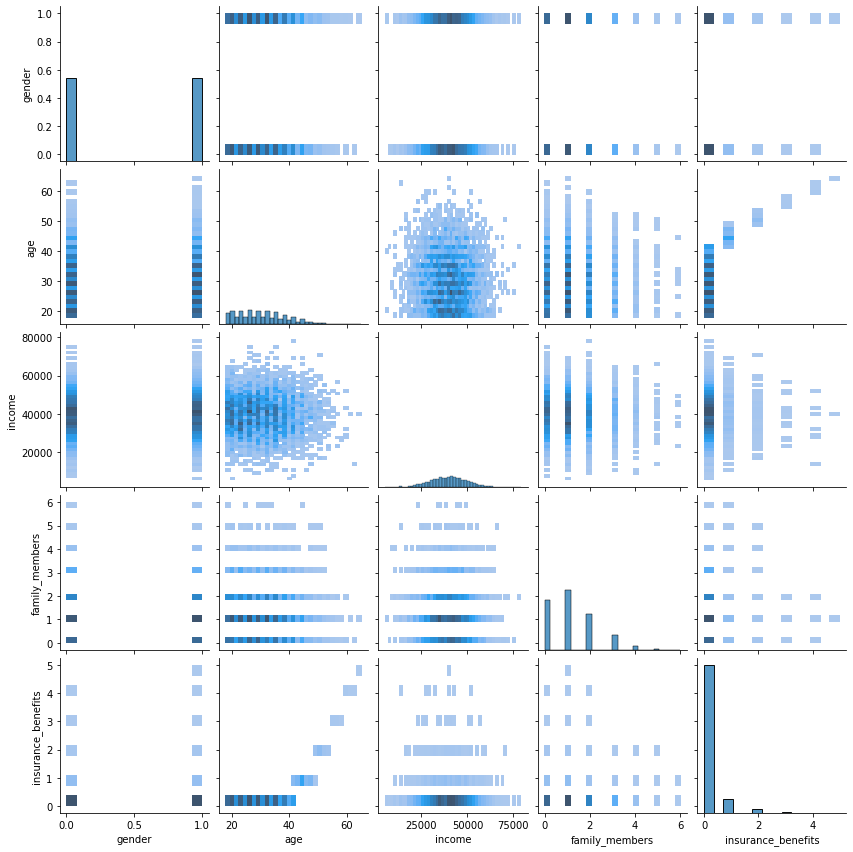

In [12]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, é um pouco difícil identificar grupos óbvios (clusters), pois é difícil combinar várias variáveis simultaneamente (para analisar distribuições multivariadas). É aí que Álgebra Linear e Aprendizado de Máquina podem ser bastante úteis.

# Tarefa 1. Clientes Similares

Na linguagem de AM, é necessário desenvolver um procedimento que retorne k vizinhos mais próximos (objetos) para um determinado objeto com base na distância entre os objetos.
Você pode querer rever as seguintes lições (capítulo -> lição)- Distância Entre Vetores -> Distância Euclidiana
- Distância Entre Vetores -> Distância de Manhattan

Para resolver a tarefa, podemos tentar diferentes métricas de distância.

Escreva uma função que retorne k vizinhos mais próximos para um n-ésimo objeto com base em uma métrica de distância especificada. O número de pagamentos de seguro recebidos não deve ser levado em consideração para esta tarefa. 

Você pode usar uma implementação pronta do algoritmo kNN do scikit-learn (verifique [o link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) ou usar a sua própria.
Teste-o para quatro combinações de dois casos
- Escalabilidade
  - os dados não são escalados
  - os dados escalados com o escalonador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Métricas de distância
  - Euclidiana
  - Manhattan

Responda às perguntas:
- Os dados não escalados afetam o algoritmo kNN? Se sim, como isso acontece?
-Quão semelhantes são os resultados usando a métrica de distância de Manhattan (independentemente da escalabilidade)?

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [14]:
def get_knn(df,features, n, k, metric):
    
    """
    Retorna os vizinhos mais próximos de k

    :param df: DataFrame pandas usado para encontrar objetos semelhantes dentro de    :param n: número do objeto pelo qual os vizinhos mais próximos são procurados
    :param k: o número dos vizinhos mais próximos a serem retornados
    :param metric: nome da métrica de distância    """
    
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(features) # treinando o modelo
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat(
        [df.iloc[nbrs_indices[0]], pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1
    )
    
    return df_res

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O algoritmo `KNN`foi implementado
</div>

Data Scalling

In [15]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [16]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2089,1.0,0.600000,0.610127,0.333333,0
503,1.0,0.430769,0.520253,0.000000,0
4474,0.0,0.630769,0.582278,0.166667,0
3701,1.0,0.430769,0.737975,0.000000,0
1498,0.0,0.523077,0.286076,0.000000,0


Agora, vamos obter registros semelhantes para um determinado registro para cada combinação

In [17]:
features = df[feature_names] #definindo as características

In [18]:
#not scalling Euclidean distance
print(get_knn(df, features, 2, 3, "euclidean"))

      gender   age   income  family_members  insurance_benefits   distance
2          0  29.0  21000.0               0                   0    0.00000
4544       1  31.0  21000.0               1                   0    2.44949
2031       0  30.0  20900.0               0                   0  100.00500


In [19]:
#not scalling Manhattan distance
print(get_knn(df, features, 2, 3, "manhattan"))

      gender   age   income  family_members  insurance_benefits  distance
2          0  29.0  21000.0               0                   0       0.0
4544       1  31.0  21000.0               1                   0       4.0
2031       0  30.0  20900.0               0                   0     101.0


In [20]:
features_scaled = df_scaled[feature_names]
print(features_scaled)

      gender       age    income  family_members
0        1.0  0.630769  0.627848        0.166667
1        0.0  0.707692  0.481013        0.166667
2        0.0  0.446154  0.265823        0.000000
3        0.0  0.323077  0.527848        0.333333
4        1.0  0.430769  0.330380        0.000000
...      ...       ...       ...             ...
4995     0.0  0.430769  0.451899        0.333333
4996     0.0  0.523077  0.663291        0.166667
4997     0.0  0.307692  0.429114        0.333333
4998     1.0  0.338462  0.413924        0.500000
4999     1.0  0.430769  0.513924        0.166667

[5000 rows x 4 columns]


In [21]:
#Scalling Euclidean distance
print(get_knn(df_scaled, features_scaled, 2, 3, "euclidean"))

     gender       age    income  family_members  insurance_benefits  distance
2       0.0  0.446154  0.265823             0.0                   0  0.000000
509     0.0  0.446154  0.255696             0.0                   0  0.010127
224     0.0  0.446154  0.277215             0.0                   0  0.011392


In [22]:
#Scalling Manhattan distance
print(get_knn(df_scaled, features_scaled, 2, 3, "manhattan"))

     gender       age    income  family_members  insurance_benefits  distance
2       0.0  0.446154  0.265823             0.0                   0  0.000000
509     0.0  0.446154  0.255696             0.0                   0  0.010127
224     0.0  0.446154  0.277215             0.0                   0  0.011392


Respostas para as perguntas

**Os dados não escalados afetam o algoritmo kNN? Se sim, como isso acontece?** 

Yes. The distance in `euclidean`and `manhattan`are smaller than in the df_scaled.

**Quão semelhantes são os resultados usando a métrica de distância de Manhattan (independentemente da escalabilidade)?** 

The results are the same, using `euclidean`or `manhattan`distance.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O algoritmo `KNN`foi utilizado para encontrar clientes semelhantes usando diferentes medidas de distância
- O impacto na normalização de dados no algoritmo `KNN` foi discutido
</div>

# Tarefa 2. É provável que o cliente receba um pagamento do seguro?

Em termos de aprendizado de máquina, podemos olhar para isso como uma tarefa de classificação binária.

Com os pagamentos de seguro sendo mais do que zero como objetivo, avalie se a abordagem da classificação kNN pode ser melhor do que um modelo dummy.

Instruções:
- Construa um classificador baseado em kNN e meça sua qualidade com a métrica F1 para k=1..10 tanto para os dados originais quanto para os escalados. Seria interessante ver como k pode influenciar a métrica de avaliação e se a escalabilidade dos dados faz alguma diferença. Você pode usar uma implementação pronta do algoritmo de classificação kNN do scikit-learn (verifique [o link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) ou usar a sua própria.
- Construa o modelo dummy, que é aleatório para este caso. Deve retornar com alguma probabilidade o valor "1". LVamos testar o modelo com quatro valores de probabilidade: 0, a probabilidade de fazer qualquer pagamento de seguro, 0,5, 1.

A probabilidade de fazer qualquer pagamento de seguro pode ser definida como

$$
P\{\text{pagamento de seguro recebido}= número de clientes que receberam qualquer pagamento de seguro}}{\text{número total de clientes}}.
$$

Divida os dados inteiros na proporção 70:30 para as partes de treinamento/teste.

In [23]:
# calcule a meta
df['insurance_benefits_received'] = np.where(df['insurance_benefits'] > 0, 1, 0)


Agora temos somente 2 classificações, 0 = não recebeu benefício e 1 = recebeu benefício

In [24]:
# verifique o desequilíbrio de classe com value_counts()

print(df['insurance_benefits_received'].value_counts()/len(df['insurance_benefits_received']))

0    0.8872
1    0.1128
Name: insurance_benefits_received, dtype: float64


In [25]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# se você tiver um problema com a linha a seguir, reinicie o kernel e execute o caderno novamente
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de Confusão')
    print(cm)
    return f1_score

In [26]:
#dummy model
# gerando saída de um modelo aleatório

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [27]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'A probabilidade: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P,len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

A probabilidade: 0.00
F1: 0.00
Matriz de Confusão
[[0.8872 0.    ]
 [0.1128 0.    ]]

A probabilidade: 0.11
F1: 0.12
Matriz de Confusão
[[0.7914 0.0958]
 [0.0994 0.0134]]

A probabilidade: 0.50
F1: 0.20
Matriz de Confusão
[[0.456  0.4312]
 [0.053  0.0598]]

A probabilidade: 1.00
F1: 0.20
Matriz de Confusão
[[0.     0.8872]
 [0.     0.1128]]



In [33]:
features = df[feature_names]
target = df['insurance_benefits_received']

In [72]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [65]:
#function to predict
def knn_pred(features_train, target_train, features_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, target_train)
    y_predict = knn.predict(features_test)
    return y_predict
    

In [93]:
def choose_knn(features_train, target_train, features_test):
    score = []
    k1 = []
    for k in range(1,11): 
        knn_predict = knn_pred(features_train, target_train, features_test,k)
        value = eval_classifier(target_test, knn_predict)
        score.append(value)
        k1.append(k)
    best_k = np.argmax(score) + 1
    best_score = score[best_k -1 ]
    return best_k, best_score    


k_original, score_original = choose_knn(features_train, target_train, features_test)
print(f"For original df the best value of F1 is:{score_original} and it´s for K = {k_original}")

F1: 0.65
Matriz de Confusão
[[0.87466667 0.018     ]
 [0.04666667 0.06066667]]
F1: 0.38
Matriz de Confusão
[[0.89066667 0.002     ]
 [0.082      0.02533333]]
F1: 0.39
Matriz de Confusão
[[0.88333333 0.00933333]
 [0.07933333 0.028     ]]
F1: 0.16
Matriz de Confusão
[[0.88933333 0.00333333]
 [0.098      0.00933333]]
F1: 0.17
Matriz de Confusão
[[0.88333333 0.00933333]
 [0.09666667 0.01066667]]
F1: 0.09
Matriz de Confusão
[[8.92000000e-01 6.66666667e-04]
 [1.02000000e-01 5.33333333e-03]]
F1: 0.12
Matriz de Confusão
[[0.89133333 0.00133333]
 [0.10066667 0.00666667]]
F1: 0.02
Matriz de Confusão
[[0.89266667 0.        ]
 [0.106      0.00133333]]
F1: 0.04
Matriz de Confusão
[[0.89266667 0.        ]
 [0.10533333 0.002     ]]
F1: 0.04
Matriz de Confusão
[[0.89266667 0.        ]
 [0.10533333 0.002     ]]
For original df the best value of F1 is:0.6523297491039427 and it´s for K = 1


In [91]:
df_scaled['insurance_benefits_received'] = np.where(df_scaled['insurance_benefits'] > 0, 1, 0)
features_scale = df_scaled[feature_names]
target_scaled = df_scaled['insurance_benefits_received']

In [92]:
features_train_scaled, features_test_scaled, target_train_scaled, target_test_scaled = train_test_split(features_scaled, target_scaled, test_size=0.3, random_state=42)

In [94]:
k_scaled, score_scaled = choose_knn(features_train_scaled, target_train_scaled, features_test_scaled)
print(f"For df_scaled the best value of F1 is:{score_scaled} and it´s for K = {k_scaled}")

F1: 0.93
Matriz de Confusão
[[0.888      0.00466667]
 [0.00933333 0.098     ]]
F1: 0.92
Matriz de Confusão
[[0.89066667 0.002     ]
 [0.01466667 0.09266667]]
F1: 0.94
Matriz de Confusão
[[0.88933333 0.00333333]
 [0.00933333 0.098     ]]
F1: 0.91
Matriz de Confusão
[[0.89133333 0.00133333]
 [0.016      0.09133333]]
F1: 0.94
Matriz de Confusão
[[0.88933333 0.00333333]
 [0.01       0.09733333]]
F1: 0.91
Matriz de Confusão
[[0.89133333 0.00133333]
 [0.01666667 0.09066667]]
F1: 0.93
Matriz de Confusão
[[0.89       0.00266667]
 [0.012      0.09533333]]
F1: 0.91
Matriz de Confusão
[[8.92000000e-01 6.66666667e-04]
 [1.66666667e-02 9.06666667e-02]]
F1: 0.93
Matriz de Confusão
[[0.89133333 0.00133333]
 [0.01266667 0.09466667]]
F1: 0.91
Matriz de Confusão
[[8.92000000e-01 6.66666667e-04]
 [1.66666667e-02 9.06666667e-02]]
For df_scaled the best value of F1 is:0.9392971246006389 and it´s for K = 3


The result with scaled DataFrame had a higher Value of F1

- The best metric was for df_scale.
- With dummy model we achive jut 0.2 of F1

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Um modelo `Dummy` (baseline) foi criado para a tarefa
- A normalização de dados foi aplicada
</div>

# Tarefa 3. Regressão (com Regressão Linear)

Com os pagamentos de seguro como objetivo, avalie qual seria o REQM para um modelo de Regressão Linear.

Construa sua própria implementação de Regressão Linear. Para isso, lembre-se de como a solução da tarefa de regressão linear é formulada em termos de Álgebra linear. Verifique o REQM para os dados originais e os escalados. Você pode ver alguma diferença no REQM entre esses dois casos?

Vamos denotar
- $X$ — matriz de características, cada linha é um caso, cada coluna é uma característica, a primeira coluna consiste em unidades
- $y$ — objetivo (um vetor)
- $\hat{y}$ — objetivo estimado (um vetor)- $w$ — vetor de peso

A tarefa de regressão linear na linguagem de matrizes pode ser formulada como
$$
y = Xw
$$

O objetivo do treinamento, então, é encontrar os $w$ que minimizaria a distância L2 (EQM) entre $Xw$ e $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que há uma solução analítica para a questão acima:

$$
w = (X^T X)^{-1} X^T y
$$

A fórmula acima pode ser usada para encontrar os pesos $w$ e o último pode ser usado para calcular valores preditos

$$
\hat{y} = X_{val}w
$$

Divida todos os dados na proporção 70:30 para as partes de treinamento/validação. Use a métrica REQM para a avaliação do modelo.

In [28]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # somando as unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        
        # somando as unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [29]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'REQM: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

Testing model with original data

In [32]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
REQM: 0.34
R2: 0.66


Testing model with df_scale

In [33]:
X_scaled = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y_scaled = df_scaled['insurance_benefits'].to_numpy()

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=12345)

lr_scaled = MyLinearRegression()

lr_scaled.fit(X_train_scaled, y_train_scaled)
print(lr_scaled.weights)

y_test_pred_scaled = lr_scaled.predict(X_test_scaled)
eval_regressor(y_test_scaled, y_test_pred_scaled)

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
REQM: 0.34
R2: 0.66


When working with linear model dosn´t matter if it´s original or scaled. REQM and R2 was equal for both cases

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O modelo de RL customizado foi implementado usando operações matriciais
- Os dados normalizados foram usados
- As métricas `REQM` e `R2` foram calculadas 
</div>

# Tarefa 4. Ofuscando dados

É melhor ofuscar os dados multiplicando as características numéricas (lembre-se, elas podem ser vistos como a matriz $X$) por uma matriz invertível $P$. 

$$
X' = X \times P
$$

Tente fazer isso e verifique como os valores das características ficarão após a transformação. Aliás, a invertibilidade é importante aqui, portanto, certifique-se de que $P$ seja realmente invertível.

Você pode querer revisar a lição 'Matrizes e Operações com Matrizes -> Multiplicação de Matrizes' para relembrar a regra de multiplicação de matrizes e sua implementação com NumPy.

In [35]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [36]:
X = df_pn.to_numpy()

Gerando uma matriz $P$ aleatória.

In [37]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Verificando se a matriz $P$ é invertível

In [39]:
inv_P = np.linalg.inv(P)
print(inv_P)

[[ 0.41467992 -1.43783972  0.62798546  1.14001268]
 [-1.06101789  0.44219337  0.1329549   1.18425933]
 [ 1.42362442  1.60461607 -2.0553823  -1.53699695]
 [-0.11128575 -0.65813802  1.74995517 -0.11816316]]


In [43]:
X_ = X @ P
print(X_)

[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 ...
 [ 4346.2234249  15289.24126492 12586.16264392 31433.50888552]
 [ 4194.09324155 14751.9910242  12144.02930637 30323.88763426]
 [ 5205.46827354 18314.24814446 15077.01370762 37649.59295455]]


Você consegue adivinhar a idade ou a renda dos clientes após a transformação?

After transform X matrix it´snt possible to find the real ages

Você pode recuperar os dados originais de $X′$ se souber $P$? Tente verificar isso com cálculos movendo $P$ do lado direito da fórmula acima para o esquerdo. As regras da multiplicação de matrizes são realmente úteis aqui

Yes. $X′$.$P^{-1}$ $=$ $X$.$P$.$P^{-1}$ and $P$ matrix is a inversible matrix

$P^{-1}$.$P$ $=$ $I$

$X′$.$P^{-1}$ $=$ $X$.$I$

$X$.$I$ $=$ $X$

$X′$.$P^{-1}$ $=$ $X$


Imprima todos os três casos para alguns clientes- Os dados originais
- O transformado
- O invertido (recuperado)

In [47]:
print(df_pn.head())
print()
print(X_[:5])
print()
print((X_ @ np.linalg.inv(P))[:5])

   gender   age   income  family_members
0       1  41.0  49600.0               1
1       0  46.0  38000.0               1
2       0  29.0  21000.0               0
3       0  21.0  41700.0               2
4       1  28.0  26100.0               0

[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]]

[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]
 [-4.84498208e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  2.61000000e+04 -1.01990740e-13]]


Você provavelmente pode ver que alguns valores não são exatamente iguais aos dos dados originais. Qual pode ser a razão disso?

Its occur during the process of invert P matrix 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A função de ofuscamento dos dados foi implementada usando matriz invertida
</div>

## Provas de que a ofuscação de dados pode funcionar com a Regressão Linear

A tarefa de regressão foi resolvida com regressão linear neste projeto. Sua próxima tarefa é provar analiticamente que o método de ofuscação fornecido não afetará a regressão linear em termos de valores preditos, ou seja, seus valores permanecerão os mesmos. Você acredita nisso? Bem, você não precisa acreditar, você deve provar isso!

Assim, os dados são ofuscados e há $X \ P$ em vez de apenas X agora. Consequentemente, existem outros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Como  $w$ e $w_P$ seriam ligados se você simplificasse a fórmula para $w_P$ acima? $w$ $=$ $P$.$w_P$

Quais seriam os valores previstos com $w_P$? $\hat{y}$ = $X$.$P$.$w_P$

O que isso significa para a qualidade da regressão linear se você medir com REQM? Don´t change

Verifique o Apêndice B Propriedades das Matrizes no final do caderno. Existem fórmulas úteis lá!

Nenhum código é necessário nesta seção, apenas explicação analítica!

**Resposta**

**Prova analítica**

$[(X.P)^{T}.X.P]^{-1}.(X.P)^{T}.y$, using last property we have:

$$[(P^{T}.X^{T}.X).P]^{-1}.(X.P)^{T}.y$$

Using this property: $(AB)^{-1} = B^{-1}A^{-1}$

$$ P^{-1}. (X^{T})^{-1}. X^{-1}.(P^{T})^{-1}.P^{T}.X^{T}.y  $$

Using this one: $A^{-1}A = AA^{-1} = I$

$$ (P^{T})^{-1}.P^{T} = I $$

$$ P^{-1}. (X^{T})^{-1}. X^{-1}.I.X^{T}.y  $$

and: $IA = AI = A$, so $I.X^{T} = X^{T}$

$$ P^{-1}. (X^{T})^{-1}. X^{-1}.X^{T}.y $$

apply this: $(AB)^{-1} = B^{-1}A^{-1}$

$$ P^{-1}. (X. X^{T})^{-1}.X^{T}.y $$

and $ w = (X^T X)^{-1} X^T y $

so 
$$ 
w_P = P^{-1}w
$$
$$
P.w_P = PP^{-1}w
$$
$$
w = P.w_P
$$
and 
$$
\hat{y} = X.P.w_P
$$
$$ 
\hat{y} = X.w
$$

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A prova analítica do ofuscamento dos dados foi apresentada
</div>

## Teste de regressão linear com ofuscação de dados

Agora, vamos provar que a Regressão Linear pode funcionar computacionalmente com a transformação de ofuscação escolhida.
Crie um procedimento ou uma classe que execute a Regressão Linear opcionalmente com a ofuscação. Você pode usar uma implementação pronta de Regressão Linear do scikit-learn ou sua própria.

Execute a Regressão Linear para os dados originais e os ofuscados, compare os valores previstos e os valores da métrica $R^2$ do REQM. Há alguma diferença?

**Procedimento**

- Crie uma matriz quadrada $P$ de números aleatórios.
- Verifique se é invertível. Caso contrário, repita o primeiro ponto até obtermos uma matriz invertível.
- <! seu comentário aqui!>
- Use $XP$ como a nova matriz de características

In [55]:
def blurlinearregression(df, feature_names, target_column, blur=False):
    X = df[feature_names].to_numpy()
    y = df[target_column].to_numpy()
    if blur==True:
        P = rng.random(size=(X.shape[1], X.shape[1]))
        x_p = X @ P
        x_p_train, x_p_test, y_train, y_test = train_test_split(x_p, y, test_size=0.3, random_state=12345 )
        lr = MyLinearRegression()
        lr.fit(x_p_train, y_train)
        y_pred = lr.predict(x_p_test)
        eval_regressor(y_test, y_pred)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345 )
        lr = MyLinearRegression()
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        eval_regressor(y_test, y_pred)

In [56]:
blurlinearregression(df, feature_names, 'insurance_benefits', blur=True)

REQM: 0.34
R2: 0.66


# Conclusões

- We prove that even with blurred feature values, the REQM remains the same.
- It shows that in mathematical and computational terms, the results are the same
- Linear models dons´t change with or whitout scalling
- But for knn the best result occur using scalling
- In KNN `euclidean`had small distances

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A RL foi utilizada com ofuscamento dos dados
- As métricas `REQM` e `R2` foram calculadas 
- As conclusões foram apresentads
</div>

# Checklist

Digite 'x' para verificar. Em seguida, pressione Shift + Enter.

- [x]  O Jupyter Notebook está aberto.
- [x]  O código está livre de erros
- [x]  As células são organizadas em ordem de lógica e execução
- [x]  A tarefa 1 foi executada
    - [x]  Existe o procedimento que pode retornar k clientes semelhantes a um determinado cliente
    - [x]  O procedimento é testado para todas as quatro combinações propostas
    - [x]  As perguntas sobre a escala/distâncias são respondidas
- [x]  A tarefa 2 foi executada
    - [x]  O modelo de classificação aleatória é construído e testado para todos os níveis de probabilidade
    - [x]  O modelo de classificação kNN é construído e testado tanto para os dados originais quanto para os escalados, a métrica F1 é calculada.- [x]  A tarefa 3 foi executada
    - [x]  A solução de regressão linear é implementada com operações matriciais.
    - [x]  O REQM é calculado para a solução implementada.
- [x]  A tarefa 4 foi executada
    - [x]  Os dados são ofuscados com uma matriz P aleatória e invertível
    - [x]  Os dados ofuscados são recuperados, alguns exemplos são impressos    - [x]  A prova analítica de que a transformação não afeta o REQM é fornecida
    - [x]  A prova computacional de que a transformação não afeta o REQM é fornecida- [x]  As conclusões foram feitas

# Apêndices

## Apêndice A: Escrevendo Fórmulas em Notebooks Jupyter

Você pode escrever fórmulas em seu Jupyter Notebook em uma linguagem de marcação de texto fornecida por um sistema de publicação de alta qualidade chamado $\LaTeX$ (pronuncia-se "Lah-tech"), e elas se parecerão com fórmulas em livros didáticos.
Para colocar uma fórmula em um texto, coloque o cifrão ($) antes e depois do texto da fórmula, por exemplo $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Se uma fórmula deve estar em seu próprio parágrafo, coloque o cifrão duplo ($$) antes e depois do texto da fórmula, por exemplo

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

A linguagem de marcação do [LaTeX](https://en.wikipedia.org/wiki/LaTeX) é muito popular entre as pessoas que usam fórmulas em seus artigos, livros e textos. Pode ser complexo, mas o básico é fácil. Confira esta [folha de dicas](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) de duas páginas  para aprender a compor as fórmulas mais comuns.

## Apêndice B: Propriedades das Matrizes

Matrizes têm muitas propriedades em Álgebra Linear. Algumas delas estão listadas aqui, o que pode ajudar na prova analítica deste projeto.

<table>
<tr>
<td>Distributividade</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Não-comutatividade</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propriedade associativa da multiplicação</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propriedade de identidade multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversividade da transposição de um produto de matrizes,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente!
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado usando funções
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Excelente organização e uso adequado de gráficos
    
Deixei algumas sugestões em seu projeto, mas não são mandatórias. Você implementou as etapas necessárias para aprovação, mas leve essas sugestões como possíveis melhorias para projetos futuros.
    
Espero que você tenha uma jornada de muito aprendizado e te de desejo muito sucesso.
    
    
**Até breve!**

</div>
